In [1]:
import pickle
import numpy as np
import os
import torch
import torch.nn as nn
import re
import sys
from tensorboard.backend.event_processing.event_accumulator import EventAccumulator
import matplotlib.pyplot as plt

root = os.path.dirname(os.path.abspath(os.curdir))
sys.path.append(root)

from sr_model.models.models import AnalyticSR, STDP_SR
from datasets import inputs

device = 'cpu'

/home/chingf/Code/sr-project/datasets/inputs.py:12: UserWarning: Emily's experimental data could not be loaded.
  warnings.warn("Emily's experimental data could not be loaded.")


## Plot train loss for different gammas

In [2]:
experiment_dir = "../trained_models/02_nonlinearities/0.4/"
iterations = []
losses = []
exps = []

for nonlinearity in os.listdir(experiment_dir):
    nonlin_exp_dir = experiment_dir + f'{nonlinearity}/'
    for ic_iter in os.listdir(nonlin_exp_dir):
        if 'configs' in ic_iter: continue
        for file in os.listdir(nonlin_exp_dir + ic_iter):
            if 'tfevents' not in file: continue
            tfevents_file = nonlin_exp_dir + ic_iter + '/' + file
            event_acc = EventAccumulator(tfevents_file)
            event_acc.Reload()
            scalar_events = event_acc.Scalars('loss_train')
            for i in range(len(scalar_events)):
                iterations.append(scalar_events[i].step)
                losses.append(scalar_events[i].value)
                exps.append(nonlinearity)
iterations = np.array(iterations)
losses = np.array(losses)
exps = np.array(exps)

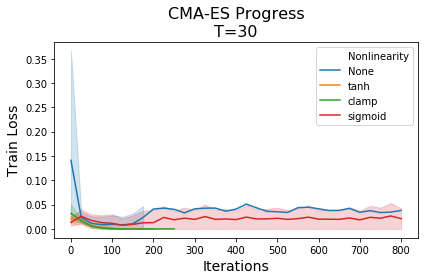

In [4]:
import seaborn as sns
import pandas as pd

df = pd.DataFrame({'Iterations': iterations, 'Loss': losses, 'Nonlinearity': exps})
sns.lineplot(
    x='Iterations', y='Loss', hue='Nonlinearity', legend='full',
    data=df
    )
plt.xlabel('Iterations', fontsize=14)
plt.ylabel('Train Loss', fontsize=14)
plt.title('CMA-ES Progress\nT=30', fontsize=16)
plt.legend()
plt.tight_layout()
plt.show()

# Plot final loss as a function of nonlinearity and gammas

In [26]:
root_dir = "../trained_models/02_nonlinearities/"
gamma_dirs = ['0.4', '0.9', '0.95']
final_losses = []
gammas = []
nonlinearities = []

for gamma_dir in gamma_dirs:
    experiment_dir = root_dir + gamma_dir + '/'
    for nonlinearity in os.listdir(experiment_dir):
        nonlin_exp_dir = experiment_dir + f'{nonlinearity}/'
        for ic_iter in os.listdir(nonlin_exp_dir):
            if 'configs' in ic_iter: continue
            for file in os.listdir(nonlin_exp_dir + ic_iter):
                if 'tfevents' not in file: continue
                tfevents_file = nonlin_exp_dir + ic_iter + '/' + file
                event_acc = EventAccumulator(tfevents_file)
                event_acc.Reload()
                try:
                    scalar_events = event_acc.Scalars('return_error')
                except:
                    continue
                final_losses.append(scalar_events[-1].value)
                gammas.append(gamma_dir)
                nonlinearities.append(nonlinearity)
final_losses = np.array(final_losses)
gammas = np.array(gammas)
nonlinearities = np.array(nonlinearities)

In [27]:
final_losses[np.logical_and(gammas=='0.9', nonlinearities=='clamp')]

array([0.01439194, 0.00781587, 0.00596851, 0.01379443, 0.04205583])